# Sentiment Analysis with NLP

In this notebook, we'll perform sentiment analysis on textual data using natural language processing (NLP) techniques. We'll walk through data preprocessing, model implementation, and extract actionable insights from the results.

## 1. Loading Sample Textual Data

We'll use a sample of tweets for our sentiment analysis. If you have your own dataset, you can easily swap it in!

In [1]:
import pandas as pd
# Sample tweets for demonstration
sample_tweets = [
    "I love the new design of your website!",
    "This product is terrible and a waste of money.",
    "Had a great experience with customer service today.",
    "I'm so disappointed with the latest update.",
    "Absolutely fantastic! Will recommend to friends.",
    "Not happy with the delivery time.",
    "The app keeps crashing. Please fix it!",
    "Best purchase I've made this year.",
    "The food was cold and tasteless.",
    "Superb quality and fast shipping!"
]
df = pd.DataFrame({'tweet': sample_tweets})
df.head()

,tweet
0,I love the new design of your website!
1,This product is terrible and a waste of money.
2,Had a great experience with customer service t...
3,I'm so disappointed with the latest update.
4,Absolutely fantastic! Will recommend to friends.


## 2. Data Preprocessing

Before we analyze sentiment, let's clean and preprocess the text. We'll lowercase everything and remove punctuation for simplicity.

In [2]:
import re
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text
df['clean_tweet'] = df['tweet'].apply(preprocess)
df.head()

,tweet,clean_tweet
0,I love the new design of your website!,i love the new design of your website
1,This product is terrible and a waste of money.,this product is terrible and a waste of money
2,Had a great experience with customer service t...,had a great experience with customer service t...
3,I'm so disappointed with the latest update.,im so disappointed with the latest update
4,Absolutely fantastic! Will recommend to friends.,absolutely fantastic will recommend to friends


## 3. Sentiment Analysis Implementation

We'll use the TextBlob library to quickly analyze the sentiment of each tweet. TextBlob assigns a polarity score: positive, negative, or neutral.

In [3]:
# Install TextBlob if needed
import sys
import subprocess
try:
    from textblob import TextBlob
except ImportError:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'textblob'])
    from textblob import TextBlob

In [4]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
df['sentiment'] = df['clean_tweet'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
df[['tweet', 'sentiment', 'sentiment_label']]

,tweet,sentiment,sentiment_label
0,I love the new design of your website!,0.318182,positive
1,This product is terrible and a waste of money.,-0.600000,negative
2,Had a great experience with customer service t...,0.800000,positive
3,I'm so disappointed with the latest update.,-0.125000,negative
4,Absolutely fantastic! Will recommend to friends.,0.400000,positive
5,Not happy with the delivery time.,-0.400000,negative
6,The app keeps crashing. Please fix it!,0.000000,neutral
7,Best purchase I've made this year.,1.000000,positive
8,The food was cold and tasteless.,-0.600000,negative
9,Superb quality and fast shipping!,0.600000,positive


## 4. Insights and Visualization

Let's see how many tweets are positive, negative, or neutral. We'll visualize the sentiment distribution with a simple bar chart.

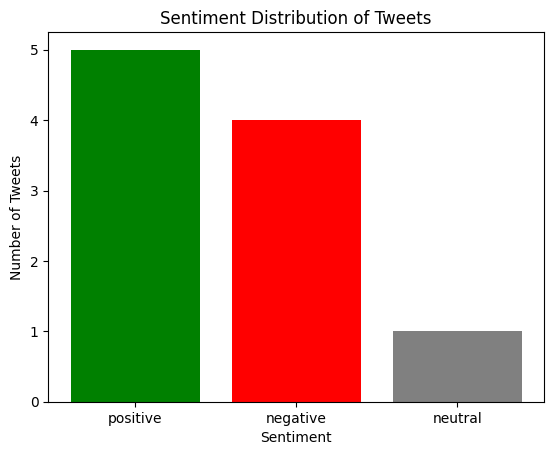

Insights:
Positive tweets: 5
Negative tweets: 4
Neutral tweets: 1


In [5]:
import matplotlib.pyplot as plt
sentiment_counts = df['sentiment_label'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

print('Insights:')
print(f"Positive tweets: {sentiment_counts.get('positive', 0)}")
print(f"Negative tweets: {sentiment_counts.get('negative', 0)}")
print(f"Neutral tweets: {sentiment_counts.get('neutral', 0)}")